In [221]:
!pip install -U scikit-learn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [286]:
# randomseed
np.random.seed(0)

#data_generation v & x
v = np.random.normal(25, 8, 200)
#v = np.full((100,),25)
x = np.linspace(10, 80, len(v))
x_rad = x*((np.pi/180))

data = np.column_stack((v,x))

# data_set: hight = (v^2*(sin(x))^2)/(2*9.8)
height = (v**2 * (np.sin(x_rad))**2) / (2 * 9.8)

# data_set: distance = (v^2*(sin(2*x)))/(9.8)
distance = (v**2 * np.sin(2*x_rad)) / 9.8

value = np.column_stack((distance,height))

# splitting dataset to training set and testing set 
data_train, data_test, value_train, value_test = train_test_split(data, value, test_size=0.2, random_state=42)

array([[6.40059329e+01, 1.24070782e+01],
       [3.71621965e+01, 4.91523011e+01],
       [3.56412761e+01, 3.84971727e+00],
       [1.14076265e+02, 9.51037201e+00],
       [7.36273264e+01, 2.43510651e+01],
       [2.20880321e+01, 2.73687637e+01],
       [8.93463815e+01, 8.21871176e+00],
       [1.85230364e+01, 1.38783354e+00],
       [7.94687428e+01, 3.48330139e+01],
       [1.19305322e+02, 2.52509753e+01],
       [5.24630344e+01, 1.56865509e+01],
       [2.47684699e+01, 1.78357182e+01],
       [1.20203257e+01, 6.25539034e-01],
       [4.47714054e+01, 1.55889036e+01],
       [5.62807086e+01, 1.74721396e+01],
       [2.21079973e+01, 3.96839208e+00],
       [1.53197114e+01, 6.43656637e+00],
       [6.90490689e+01, 1.69472223e+01],
       [6.51544710e+01, 4.60040488e+01],
       [6.41455220e+01, 1.53616055e+01],
       [5.08654065e+01, 3.39161790e+01],
       [1.57422285e+02, 3.81656533e+01],
       [5.34284347e+01, 5.10179193e+00],
       [4.69702744e+01, 2.97592954e+00],
       [4.939331

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, )
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.007), loss='mse', metrics='accuracy')


In [221]:
history = model.fit(data_train, value_train, validation_split = 0.2, epochs=200, batch_size=2)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 2276.9043 - accuracy: 0.1719 - val_loss: 593.4205 - val_accuracy: 0.8438
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 620.5178 - accuracy: 0.9453 - val_loss: 720.5522 - val_accuracy: 0.8438
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 365.5201 - accuracy: 0.9297 - val_loss: 308.1485 - val_accuracy: 0.8438
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 328.7660 - accuracy: 0.9297 - val_loss: 199.2571 - val_accuracy: 0.8750
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 290.5135 - accuracy: 0.9141 - val_loss: 153.9931 - val_accuracy: 0.8438
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 276.6211 - accuracy: 0.8906 - val_loss: 152.0279 - val_accuracy: 0.8438
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 284.1528 - accuracy: 0.9219 - val_loss: 179.1261 - val_a

2/2 [==============================] - 0s 3ms/step - loss: 9.9681 - accuracy: 0.9500


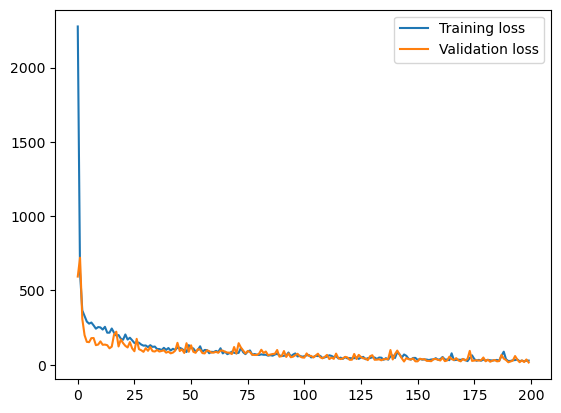

In [222]:
# evaluate model
model.evaluate(data_test, value_test)

# drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 1ms/step


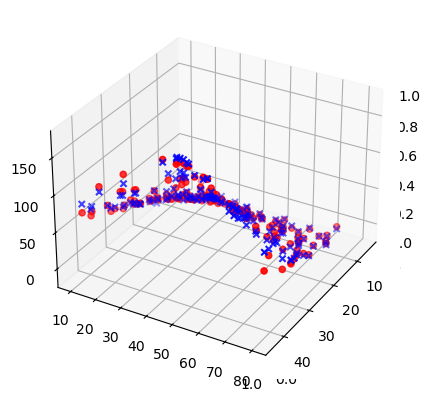

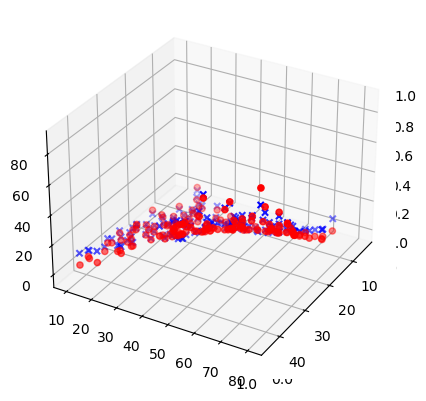

In [236]:
#drawing pictures
def three_dimension_picture_distance(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(30, 30)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,0]
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,0]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')

def three_dimension_picture_height(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(30, 30)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,1]
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,1]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')
    
three_dimension_picture_distance(data_train,model.predict(data_train),value_train)
three_dimension_picture_height(data_train,model.predict(data_train),value_train)


5/5 [==============================] - 0s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5/5 [==============================] - 0s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


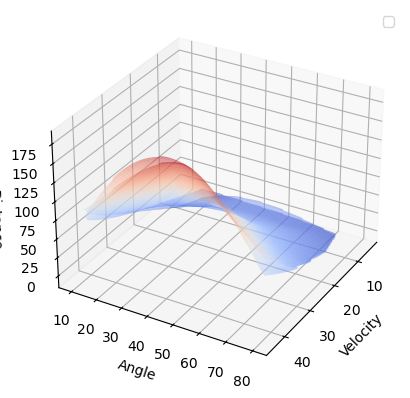

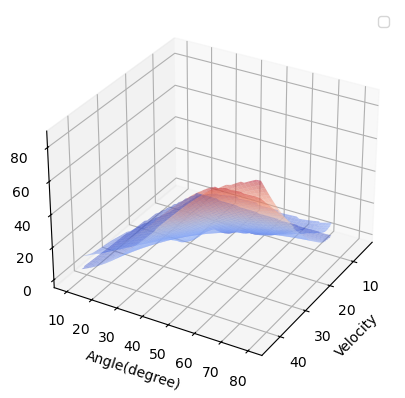

In [295]:
from scipy.interpolate import griddata

def three_dimension_picture_distance_X(data_set, data_consequences, value_set):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(30, 30)
    
    # getting data
    x = data_set[:, 0]
    y = data_set[:, 1]
    z_actual = value_set[:, 0]
    z_pred = data_consequences[:, 0]
    
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Angle')
    ax.set_zlabel('Distance')
    ax.legend()
    
    # calculating smooth surfaces by extrapolation
    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
    points = np.vstack([x, y]).T
    z_grid_actual = griddata(points, z_actual, (x_grid, y_grid), method='cubic')
    z_grid_pred = griddata(points, z_pred, (x_grid, y_grid), method='cubic')
    
    ax.plot_surface(x_grid, y_grid, z_grid_actual, alpha=0.5, cmap='coolwarm', label='Actual surface')
    ax.plot_surface(x_grid, y_grid, z_grid_pred, alpha=0.5, cmap='coolwarm', label='Predicted surface')


def three_dimension_picture_height_X(data_set, data_consequences, value_set):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(30, 30)
    
    # getting data
    x = data_set[:, 0]
    y = data_set[:, 1]
    z_actual = value_set[:, 1]
    z_pred = data_consequences[:, 1]
    
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Angle(degree)')
    ax.set_zlabel('Height')
    ax.legend()
    
    # calculating smooth surfaces by extrapolation
    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
    points = np.vstack([x, y]).T
    z_grid_actual = griddata(points, z_actual, (x_grid, y_grid), method='cubic')
    z_grid_pred = griddata(points, z_pred, (x_grid, y_grid), method='cubic')
    
    ax.plot_surface(x_grid, y_grid, z_grid_actual, alpha=0.5, cmap='coolwarm', label='Actual surface')
    ax.plot_surface(x_grid, y_grid, z_grid_pred, alpha=0.5, cmap='coolwarm', label='Predicted surface')
    
three_dimension_picture_distance_X(data_train, model.predict(data_train), value_train)
three_dimension_picture_height_X(data_train, model.predict(data_train), value_train)

In [224]:
data_train #[v,x]

array([[25.44932274, 37.78894472],
       [31.58803323, 79.29648241],
       [21.90138546, 23.36683417],
       [43.15803699, 18.44221106],
       [27.38590539, 52.91457286],
       [23.62762935, 78.59296482],
       [36.75487016, 20.20100503],
       [18.16723409, 16.68341709],
       [30.0802515 , 60.30150754],
       [34.43023657, 40.25125628],
       [22.85597303, 50.10050251],
       [19.79179525, 70.85427136],
       [17.18177696, 11.75879397],
       [21.51877159, 54.32160804],
       [23.75991926, 51.15577889],
       [15.12139344, 35.67839196],
       [13.06993926, 59.24623116],
       [26.01529674, 44.47236181],
       [31.8546449 , 70.50251256],
       [25.08400017, 43.76884422],
       [27.5355409 , 69.44723618],
       [39.28696395, 44.12060302],
       [28.02530016, 20.90452261],
       [31.0883018 , 14.22110553],
       [26.25079175, 22.31155779],
       [32.37765337, 51.85929648],
       [11.34983847, 24.77386935],
       [37.34411676, 76.48241206],
       [21.77458442,

In [292]:
np.set_printoptions(suppress=True)
value_train #[real_distance,real_height]

array([[ 64.0059329 ,  12.40707824],
       [ 37.16219648,  49.15230113],
       [ 35.64127609,   3.84971727],
       [114.07626494,   9.51037201],
       [ 73.62732639,  24.35106509],
       [ 22.0880321 ,  27.36876372],
       [ 89.34638155,   8.21871176],
       [ 18.5230364 ,   1.38783354],
       [ 79.46874276,  34.83301392],
       [119.30532206,  25.2509753 ],
       [ 52.4630344 ,  15.68655086],
       [ 24.76846993,  17.83571823],
       [ 12.02032565,   0.62553903],
       [ 44.77140537,  15.58890365],
       [ 56.28070857,  17.47213956],
       [ 22.10799727,   3.96839208],
       [ 15.31971142,   6.43656637],
       [ 69.04906887,  16.94722231],
       [ 65.15447101,  46.0040488 ],
       [ 64.14552204,  15.36160546],
       [ 50.86540646,  33.91617905],
       [157.42228545,  38.16565327],
       [ 53.42843466,   5.10179193],
       [ 46.97027441,   2.97592954],
       [ 49.39331009,   5.06732835],
       [103.9190208 ,  33.08477823],
       [ 10.00247772,   1.15406475],
 

In [226]:
model.predict(data_train) #[predict_distance,predict_height]

5/5 [==============================] - 0s 2ms/step


array([[ 65.25133   ,  11.387222  ],
       [ 41.88534   ,  49.562668  ],
       [ 39.373592  ,   4.2724147 ],
       [107.01855   ,  17.274157  ],
       [ 72.87312   ,  27.98432   ],
       [ 20.649353  ,  30.56373   ],
       [ 84.1846    ,  11.912497  ],
       [ 15.972311  ,   0.29554653],
       [ 73.5594    ,  38.76034   ],
       [129.15912   ,  24.926971  ],
       [ 53.18105   ,  17.97415   ],
       [ 23.133204  ,  20.463804  ],
       [  3.157286  ,  -1.9607105 ],
       [ 43.015163  ,  15.621681  ],
       [ 56.787907  ,  20.19724   ],
       [ 22.996088  ,   4.605229  ],
       [ 16.514177  ,   6.878593  ],
       [ 71.840065  ,  21.434265  ],
       [ 60.86656   ,  47.089455  ],
       [ 67.90945   ,  19.372705  ],
       [ 43.671227  ,  35.39073   ],
       [164.6548    ,  43.673874  ],
       [ 51.790447  ,   5.552256  ],
       [ 46.793156  ,   5.183865  ],
       [ 49.571438  ,   5.3886733 ],
       [ 97.39233   ,  36.942097  ],
       [  3.3079245 ,   2.4826694 ],
 

In [276]:
#showing the predicting consequence

v_input = float(input("initial_velocity（m/s）："))
x_input = float(input("initial_angle（degree）："))

x_rad_input = x_input * (np.pi / 180)

distance_t = (v_input**2 * np.sin(2*x_rad_input)) / 9.8
height_t = (v_input**2 * (np.sin(x_rad_input))**2) / (2 * 9.8)

print('(1)real_distance: ', distance_t)
print('(2)real_height: ', height_t)

predicted_values = model.predict(np.array([[v_input, x_input]]))[0]
predict_distance = predicted_values[0]
predict_height = predicted_values[1]

print('(3)predict_distance: ', predict_distance)
print('(4)predict_height: ', predict_height)

initial_velocity（m/s）： 30
initial_angle（degree）： 45


(1)real_distance:  91.83673469387755
(2)real_height:  22.959183673469393
1/1 [==============================] - 0s 19ms/step
(3)predict_distance:  86.67532
(4)predict_height:  22.928946
